In [76]:
# Importing the dataset

import numpy as np
apple = np.load('apple.npy')
rainbow = np.load('rainbow.npy')

In [77]:
# Preparing the dataset
apple = np.hstack((apple, np.zeros((apple.shape[0], 1), dtype = apple.dtype)))
rainbow = np.hstack((rainbow, np.ones((rainbow.shape[0], 1), dtype = rainbow.dtype)))

data = np.concatenate((apple, rainbow))
np.random.shuffle(data)
X, y = data[:, : -1], data[:, -1:]

In [78]:
# Split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)


In [79]:
# Logistic Regression using Batch Gradient Descent
from numpy.core.fromnumeric import transpose

class LogisticRegression():
    def __init__(self) -> None:
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1.0/(1 + np.exp(-z))

    def cost(self, X, y):
        [m, n] = X.shape

        y = np.array(y).reshape((m, 1))

        y_hat = self.sigmoid(np.dot(X, self.w) + self.b)
        loss = -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))
        return loss


    def gradients(self, X, y):
        [m, n] = X.shape
        X = np.array(X)
        y = np.array(y).reshape((m, 1))
        hx = self.sigmoid(np.dot(X, self.w) + self.b ) 
        db = (1/m) * np.sum(hx - y)
        dw = (1/m) * np.dot(X.T, hx - y)

        return dw, db

    def fit(self, X, y, epochs = 100, lr = 0.1):
        [m, n] = X.shape
        self.w = np.zeros((n,1))
        self.b = 0

        # X = self.normalize(X)

        cost = []

        for i in range(0, epochs):
            dw, db = self.gradients(X, y)
            self.w -= lr * dw
            self.b -= lr * db
            c = self.cost(X, y)
            cost.append(c)
            # print(c)
        return cost

    def predict(self, X):
        [m, n] = X.shape
        hx = self.sigmoid((X @ self.w) + self.b)
        pred = np.zeros((m, 1))
        pred[np.where(hx >= 0.5)] = 1
        return pred 

    def accuracy(self, y, y_hat):  
        p = 0
        for i in range(0,len(y)):
            if y[i] == y_hat[i]:
                p += 1
        acc = p / len(y)
        return acc * 100  
    

In [80]:
# Normalize data to avoid 'overflow encountered in exp' warning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
# Training the model
regressor = LogisticRegression()
arr = regressor.fit(X_train, y_train)

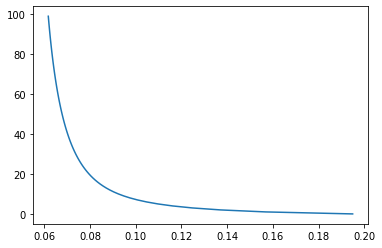

In [82]:
# Plot cost at each iteration for gradient Descent
import matplotlib.pyplot as plt
plt.plot(arr, range(0, 100))


In [83]:
# Test our model and print accuracy(in %)
pred = regressor.predict(np.array(X_test))
accuracy = regressor.accuracy(y_test, pred)
accuracy

98.54923042933942

In [84]:
# Using sklearn to train model and compare with custom model
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()

In [85]:
regr.fit(X_train, y_train)
predsk = regr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predsk))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7113
           1       0.98      0.99      0.99      6466

    accuracy                           0.99     13579
   macro avg       0.99      0.99      0.99     13579
weighted avg       0.99      0.99      0.99     13579



In [87]:
def accuracy( y, y_hat):  
        p = 0
        for i in range(0,len(y)):
            if y[i] == y_hat[i]:
                p += 1
        acc = p / len(y)
        return acc * 100  
accuracy(y_test, predsk)

98.68178805508506